In [67]:
from vpic_reader import *
from TurbPy.vpic_info import *
import matplotlib.pyplot as plt

In [2]:
dirs = '/pscratch/sd/g/goodwill/KH_subash/'

In [3]:
rc=vpic_read(dirs)

In [4]:
rc.vars2load('all')

In [5]:
rc.loadslice(0)

In [6]:
rc.jxe[0,0]

array([-0.00523171], dtype=float32)

In [71]:
j_dot_E_e=np.zeros(101)
j_dot_E_i=np.zeros(101)
j_dot_E=np.zeros(101)
time_all = np.zeros(101)
for i in range(101):
    rc.loadslice(i)
    time_all[i]=rc.twci
    j_dot_E_e[i]=np.mean(rc.jxe*rc.ex + rc.jye*rc.ey + rc.jze*rc.ez)
    j_dot_E_i[i]=np.mean(rc.jxi*rc.ex + rc.jyi*rc.ey + rc.jzi*rc.ez)
    j_dot_E[i]= j_dot_E_e[i] + j_dot_E_i[i]

In [8]:
def load_vars(dirs, time_step, species = 'electron'):
    hydro_file = h5py.File(dirs+"hydro_hdf5/T."+str(time_step)+"/hydro_" + species + "_"+str(time_step)+".h5", 'r')
    field_file = h5py.File(dirs+"field_hdf5/T."+str(time_step)+"/fields_" + str(time_step)+".h5", 'r')
    
    jvec={}
    var_dict = {}
    vars = ['cbx', 'cby', 'cbz', 'ex', 'ey', 'ez']
    group=field_file['Timestep_'+str(time_step)]

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,:])

    jvec={}
    vars = ['jx', 'jy', 'jz', 'ke', 'px', 'py', 'pz', 
            'rho', 'txx', 'txy', 'tyy', 'tyz', 'tzx', 'tzz']
    group=hydro_file['Timestep_'+str(time_step)]

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,:])
    return (var_dict)

In [62]:
times = get_times(dirs)
JE_av = np.zeros(len(times))
print(times)
for t in np.arange(0,len(times)):
  dse = load_vars(dirs, times[t], species = 'electron')
  dsi = load_vars(dirs, times[t], species = 'ion')

  jx0 = dse['jx'] + dsi['jx']
  jy0 = dse['jx'] + dsi['jx'] 
  jz0 = dse['jx'] + dsi['jx']

  # ex = load_var('ex', dirs, times[t])
  # ey = load_var('ey', dirs, times[t])
  # ez = load_var('ez', dirs, times[t])

  # jeE = (jxe * ex) + (jye * ey) + (jze * ez)
  # jiE = (jxi * ex) + (jyi * ey) +dse (jzi * ez)
  JEe  = (dse['jx'] * dse['ex']) + (dse['jy'] * dse['ey']) + (dse['jz'] * dse['ez'])
  JEi  = (dsi['jx'] * dsi['ex']) + (dsi['jy'] * dsi['ey']) + (dsi['jz'] * dsi['ez'])
  JE_av[t] = np.mean(JEe + JEi, dtype = np.float64)

[     0   3620   7240  10860  14480  18100  21720  25340  28960  32580
  36200  39820  43440  47060  50680  54300  57920  61540  65160  68780
  72400  76020  79640  83260  86880  90500  94120  97740 101360 104980
 108600 112220 115840 119460 123080 126700 130320 133940 137560 141180
 144800 148420 152040 155660 159280 162900 166520 170140 173760 177380
 181000 184620 188240 191860 195480 199100 202720 206340 209960 213580
 217200 220820 224440 228060 231680 235300 238920 242540 246160 249780
 253400 257020 260640 264260 267880 271500 275120 278740 282360 285980
 289600 293220 296840 300460 304080 307700 311320 314940 318560 322180
 325800 329420 333040 336660 340280 343900 347520 351140 354760 358380
 362000]


In [14]:
print(JE_av[0])
j_dot_E_e[0] + j_dot_E_i[0]

-9.695402525267127e-08


-9.695399283415895e-08

In [15]:
print(((rc.jxe*rc.ex + rc.jye*rc.ey + rc.jze*rc.ez) + (rc.jxi*rc.ex + rc.jyi*rc.ey + rc.jzi*rc.ez))[:,:,0])

[[-8.54076716e-05  1.53795074e-04  2.27478857e-04 ...  6.30706563e-05
  -7.32825429e-05 -3.83331462e-05]
 [ 7.88172983e-05  1.41860975e-04 -3.49270485e-05 ... -7.00733799e-05
  -9.69561952e-05  5.71682613e-05]
 [-7.37621085e-05 -3.67214852e-05 -1.17756827e-04 ... -6.38027414e-05
  -1.16323736e-05 -1.01822174e-04]
 ...
 [ 8.54791506e-05  6.59141806e-05  2.42810838e-05 ...  3.74706506e-05
   5.61422894e-05 -1.31802590e-05]
 [ 4.56901216e-05  4.00751887e-05  6.84268962e-05 ...  4.53445027e-05
   1.62070046e-05  1.96658730e-05]
 [-4.38887582e-05  1.51910326e-05  6.15417448e-05 ...  8.29167038e-05
   5.77062092e-05  1.42725885e-05]]


In [64]:
print(JE_av[0])

-9.695403684836082e-08


In [65]:
print(j_dot_E_e[0] + j_dot_E_i[0])

-9.695399283415895e-08


In [28]:
print(np.mean(JEe, dtype = np.float64))

-9.403728367208548e-08


In [58]:
print(JEe[0,1])

[-6.517821e-05]


In [60]:
print((rc.jxe*rc.ex + rc.jye*rc.ey + rc.jze*rc.ez)[0,0])

[-6.517821e-05]


In [52]:
print(np.mean(rc.jzi * rc.ez))

0.0


In [53]:
print(np.mean(dsi['jz'] * dsi['ez']))

0.0


In [79]:
print(rc.dtwpe)

0.05524272


In [78]:
dt=rc.dtwpe*3620
print(dt)

199.9786464


In [75]:
JE_cum = np.cumsum(-JE_av * dt)
j_dot_E_cum = np.cumsum(-j_dot_E * dt)

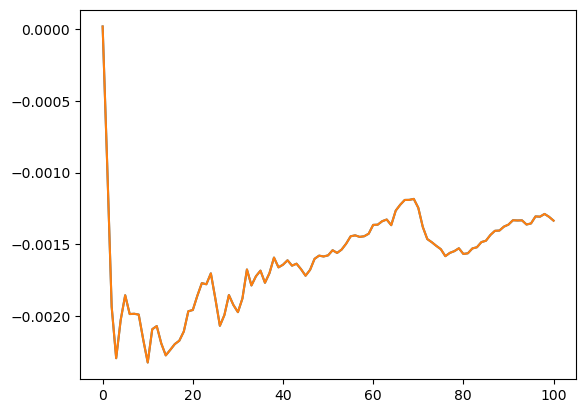

In [77]:
plt.plot(JE_cum)
plt.plot(j_dot_E_cum)